# Simple Linear Regression - Predict Teen Birth Rate based on Poverty Level

## Importing Libraries

In [38]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels
import statsmodels.api as sm
import pylab as py

import numpy as np

Printing Versions of Libraries

In [39]:
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('sklearn version: {}'.format(skl.__version__))
print('statsmodels version: {}'.format(statsmodels.__version__))
print('numpy version: {}'.format(np.__version__))

pandas version: 1.5.3
matplotlib version: 3.7.0
sklearn version: 1.2.1
statsmodels version: 0.13.5
numpy version: 1.23.5


## Loading data

Details about the dataset were obtained from  obtained from PennSate Eberly College of Science (https://online.stat.psu.edu/stat462/node/101/)

Teen Birth Rate and Poverty Level Data
This dataset of size n = 51 are for the 50 states and the District of Columbia in the United States (poverty.txt). The variables are y = year 2002 birth rate per 1000 females 15 to 17 years old and x = poverty rate, which is the percent of the state’s population living in households with incomes below the federally defined poverty level. (Data source: Mind On Statistics, 3rd edition, Utts and Heckard).

In [40]:
df = pd.read_csv('poverty.csv')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Analyzing Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


Dataset usage

Our dataset has 6 features and 51 observations. We will only use 'PovPct' and 'Brth15to17' features for the experiment. 'PovPct' will be our independent or predictor variable and 'Brth15to17' feature will be dependent or outcome variable.  

Splitting the dataset into predictor(X) and outcome(y)

In [42]:
X = df[['PovPct']]
y = df[['Brth15to17']]

Visualizing the dataset

First we will visualize the dataset using scatterplot to make sure there is a linear relationship between PovPct and Brth15to17, because simple linear regression is based on the assumption that there should be linear relationship between the variables into consideration.

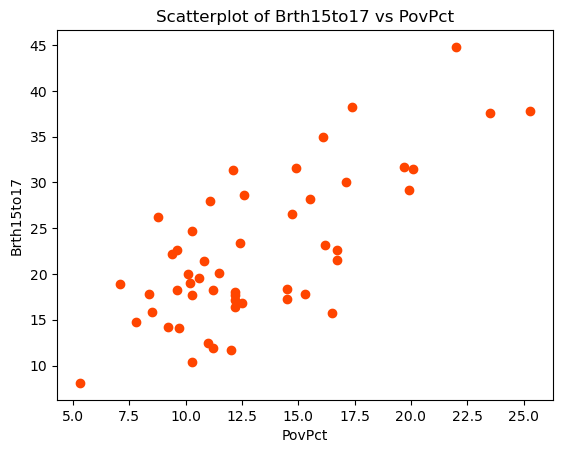

In [43]:
plt.scatter(X, y, c='orangered')
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')
plt.title('Scatterplot of Brth15to17 vs PovPct')
plt.show()

The plot of the data above (birth rate on the vertical) shows a generally linear relationship, on average, with a positive slope. As the poverty level increases, the birth rate for 15 to 17 year old females tends to increase as well.

Next we will visualize the dataset using Box and whisker plot to make sure  there are no outliers. An outlier is a value that is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1). If there is an outlier, a circle will apper in the box plot for the observation.

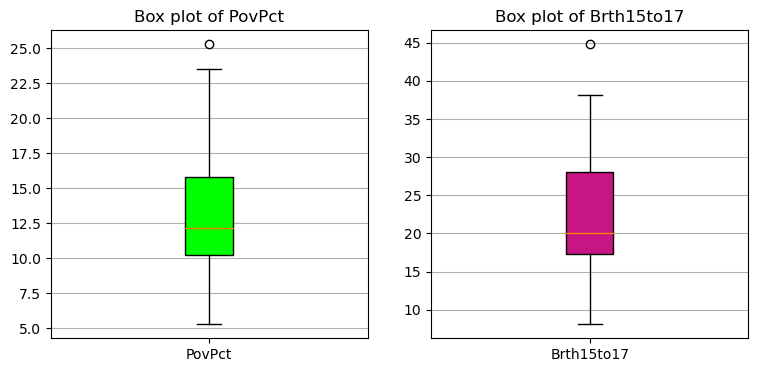

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = ax1.boxplot(df['PovPct'], 
                   vert=True,
                   patch_artist=True,
                   labels=['PovPct'])

for patch in bplot1['boxes']:
    patch.set_facecolor('lime')
ax1.set_title('Box plot of PovPct')


bplot2 = ax2.boxplot(df['Brth15to17'], 
                   vert=True,
                   patch_artist=True,
                   labels=['Brth15to17'])

for patch in bplot2['boxes']:
    patch.set_facecolor('mediumvioletred')
ax2.set_title('Box plot of Brth15to17')

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    
plt.show()

Box plots show that there is an outlier in the data. Let's check the min, max and mean value of the dataset so that we can find the outlier points for both variables. 

In [45]:
df[['PovPct', 'Brth15to17']].describe()

,PovPct,Brth15to17
count,51.000000,51.000000
mean,13.117647,22.282353
std,4.277228,8.043499
min,5.300000,8.100000
25%,10.250000,17.250000
50%,12.200000,20.000000
75%,15.800000,28.100000
max,25.300000,44.800000


Data description shows that max values for PovPct and Brth15to17 are 25.300000 and 44.800000 respectively. Those values must be outliers. However, although they are outliers, they are not unreasonable values for PovPct and Brth15to17 features. Therefore, we will not remove it from our dataset.

## Performing Simple Linear Regression

Splitting the dataset into training and test sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

Create linear regression object

In [47]:
regr = linear_model.LinearRegression()

Train the model using the training sets

In [48]:
regr.fit(X_train, y_train)

LinearRegression()

Make predictions using the testing set 

In [49]:
y_pred = regr.predict(X_test)

Viewing model summary

In [50]:
intercept = regr.intercept_[0]
print('Intercept: %.3f' % intercept)

coefficient = regr.coef_[0][0]
print('Coefficient: %.3f' % coefficient)

# The coefficient of determination: 1 is perfect prediction
r_squared = r2_score(y_test, y_pred)*100
print('Coefficient of determination (R\u00b2): %.2f' % r_squared)
adjusted_r_squared = (1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]))
print('Adjusted coefficient of determination (R\u00b2(Adj)): %.2f' % adjusted_r_squared)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Intercept: 4.024
Coefficient: 1.389
Coefficient of determination (R²): 59.74
Adjusted coefficient of determination (R²(Adj)): 59.74
Mean squared error: 29.59


Partial Regression Plot - Plotting fitted line on test data

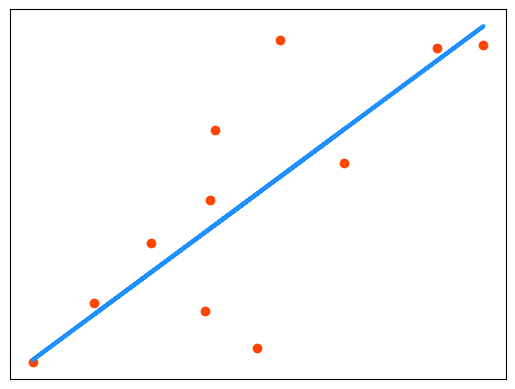

In [51]:
plt.scatter(X_test, y_test, color="orangered")
plt.plot(X_test, y_pred, color="dodgerblue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Plotting fitted line plot on original data

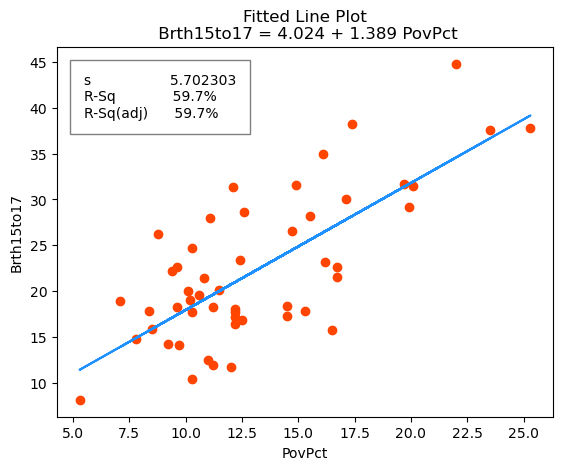

In [52]:
y_pred_original_data = regr.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y, c='orangered')
ax.plot(X, y_pred_original_data, color="dodgerblue")

# The value of s tells us roughly the standard deviation of the 
#differences between the y-values of individual observations and 
#predictions of y based on the regression line
s = (y_test - y_pred).std()

ax.text(5.5, 39, 's                  %.6f\nR-Sq             %.1f%%\nR-Sq(adj)      %.1f%%' % (s, r_squared, adjusted_r_squared),
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.title('Fitted Line Plot\n Brth15to17 = %.3f + %.3f PovPct' % (intercept, coefficient))
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')
plt.show()

## Interpretation

The equation of the fitted regression line is given near the top of the plot. The equation should really state that it is for the “average” birth rate (or “predicted” birth rate would be okay too) because a regression equation describes the average value of y as a function of one or more x-variables. In statistical notation, the equation could be written 
y = 4.024 + 1.389x.

The interpretation of the slope (value = 1.389) is that the 15 to 17 year old birth rate increases 1.389 units, on average, for each one unit (one percent) increase in the poverty rate. 
The interpretation of the intercept (value=4.024) is that if there were states with poverty rate = 0, the predicted average for the 15 to 17 year old birth rate would be 4.024 for those states. Since there are no states with poverty rate = 0 this interpretation of the intercept is not practically meaningful for this example.
In the graph with a regression line present, we also see the information that s = 5.5702303 and r2 = 59.7%.

-The value of s tells us roughly the standard deviation of the differences between the y-values of individual observations and predictions of y based on the regression line.
-The value of r2 can be interpreted to mean that poverty rates "explain" 59.7% of the observed variation in the 15 to 17 year old average birth rates of the states.
-The R2 (adj) value (59.7%) is an adjustment to R2 based on the number of x-variables in the model (only one here) and the sample size. With only one x-variable, the adjusted R2 is not important.

## Residual Plots

Shmueli, G., Bruce, P., Yahav, I., Patel, N. R., & Lichtendahl, K. C. (2016). Data Mining for Business Analytics: Concepts, Techniques, and Applications with XLMiner. https://dl.acm.org/citation.cfm?id=3035593

Predictions based on this equation are the best predictions possible in the sense that they will be unbiased (equal to the true values on average) and will have the smallest mean squared error compared to any unbiased estimates if we make the following assumptions:

1. The noise ϵ (or equivalently, Y ) follows a normal distribution.
2. The choice of predictors and their form is correct (linearity).
3. The records are independent of each other.
4. The variability in the outcome values for a given set of predictors is the same regardless of the values of the predictors (homoskedasticity).

We have already seen that the form of the predictors is correct and there is a linear relationship from the first scatter plot and we will also assume that records are indepedent of each other. Therefore, assumptions 2 and 3 are already met. Let's check further to see how we are doing with assumptions 1 and 2. 

Q-Q plot

Checking first assumptions using Q-Q plot.

Q-Q plot is useful to determine if the residuals follow a normal distribution. If the data values in the plot fall along a roughly straight line at a 45-degree angle, then the residuals is normally distributed. 

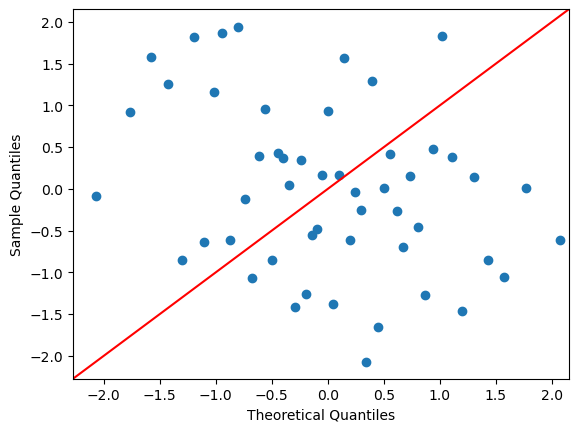

In [53]:
residuals = y - y_pred_original_data
fig = sm.qqplot(residuals, fit=True, line = '45')
plt.show()

Residuals stray from the 45-degree line by a lot, which means that the assumption of normality is not met. It was expected because our coefficient of determination (R-sq) value is only around 60%. We will take it for the purpose of illustration. 

Residual vs. fitted values plot

We use this plot to confirm the fourth assumption, the homoscedasticity. In this plot, predictor is on the x-axis and residuls is on the y-axis. Assumption of homoscedasticity will be met if residuals are randomly and evenly distributed around the value zero throughout the plot. 

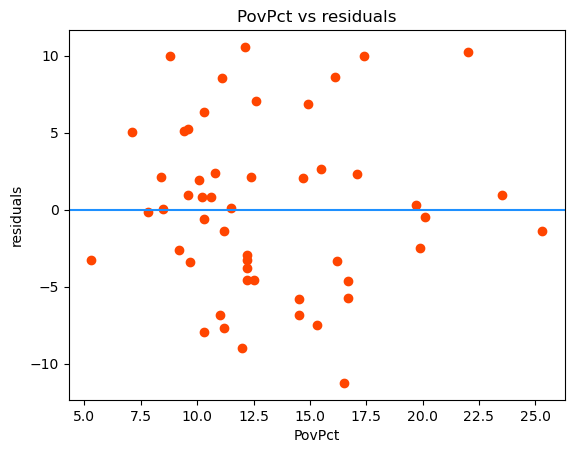

In [55]:
plt.scatter(X, residuals, c='orangered')
plt.axhline(y=0, color="dodgerblue")
plt.xlabel('PovPct')
plt.ylabel('residuals')
plt.title('PovPct vs residuals')
plt.show()

Above plot shows that residuals are randomly and nearly evenly distributed around the value zero throughout the plot, which means the assumption of homoscedasticity is met.